In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NYPD_Arrest_Data__Year_to_Date__20250408.csv')

In [114]:
print(df.shape) # Determine the dimensions of the DataFrame

print(df.index) # View the index

(260503, 19)
RangeIndex(start=0, stop=260503, step=1)


In [115]:
df.info() # Displays information about the DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260503 entries, 0 to 260502
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                260503 non-null  int64  
 1   ARREST_DATE               260503 non-null  object 
 2   PD_CD                     260495 non-null  float64
 3   PD_DESC                   260503 non-null  object 
 4   KY_CD                     260471 non-null  float64
 5   OFNS_DESC                 260503 non-null  object 
 6   LAW_CODE                  260503 non-null  object 
 7   LAW_CAT_CD                259113 non-null  object 
 8   ARREST_BORO               260503 non-null  object 
 9   ARREST_PRECINCT           260503 non-null  int64  
 10  JURISDICTION_CODE         260503 non-null  int64  
 11  AGE_GROUP                 260503 non-null  object 
 12  PERP_SEX                  260503 non-null  object 
 13  PERP_RACE                 260503 non-null  o

In [116]:
df.describe() # Descriptive statistics include those that summarize the central tendency,
              # dispersion and shape of a dataset’s distribution, excluding NaN values.

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.605030e+05,260495.000000,260471.000000,260503.000000,260503.000000,2.605030e+05,260503.000000,260499.000000,260499.000000
mean,2.893983e+08,431.642008,252.544955,63.410936,0.904542,1.005552e+06,207816.822739,40.735495,-73.920132
std,5.439968e+06,271.557874,144.942419,34.955962,6.882318,2.203680e+04,29500.726774,0.265042,0.464304
min,2.797635e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.252711
25%,2.847299e+08,117.000000,114.000000,40.000000,0.000000,9.907960e+05,185644.000000,40.676190,-73.976436
50%,2.894597e+08,397.000000,341.000000,63.000000,0.000000,1.005257e+06,206961.000000,40.734681,-73.924170
75%,2.941042e+08,705.000000,344.000000,101.000000,0.000000,1.017771e+06,235593.000000,40.813303,-73.879026
max,2.987485e+08,997.000000,995.000000,483.000000,97.000000,1.067220e+06,271282.000000,40.911236,0.000000


In [117]:
df.isnull().sum() # Determine the number of missing values in each column of a DataFrame.

,0
ARREST_KEY,0
ARREST_DATE,0
PD_CD,8
PD_DESC,0
KY_CD,32
OFNS_DESC,0
LAW_CODE,0
LAW_CAT_CD,1390
ARREST_BORO,0
ARREST_PRECINCT,0


In [118]:
df.head() # Display the first 5 rows of the DataFrame

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281369711,01/30/2024,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,F,M,25,0,25-44,M,BLACK,1000558,231080,40.800930,-73.941098,POINT (-73.9410982410066 40.8009303727402)
1,284561406,03/30/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,44,0,25-44,M,BLACK,1004297,242846,40.833209,-73.927554,POINT (-73.927554 40.833209)
2,284896016,04/06/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,19,0,25-44,M,BLACK,997304,222853,40.778348,-73.952863,POINT (-73.952863 40.778348)
3,285569016,04/18/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,69,0,25-44,M,BLACK,1010576,175628,40.648698,-73.905128,POINT (-73.905128 40.648698)
4,287308954,05/22/2024,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,M,18,0,18-24,M,WHITE,991530,217373,40.763313,-73.973717,POINT (-73.973717 40.763313)


In [119]:
df['ARREST_KEY'] = df['ARREST_KEY'].astype(str) # Ensure all values in ARREST_KEY are string
print(df['ARREST_KEY'].is_unique) # Dtermine if values are unique.

df.set_index('ARREST_KEY', inplace=True) # Set the index to ARREST_KEY

df.drop(['PD_CD','KY_CD', 'New Georeferenced Column'], axis=1, inplace = True) # Remove these columns from the DataFrame.

True


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260503 entries, 281369711 to 298548871
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARREST_DATE        260503 non-null  object 
 1   PD_DESC            260503 non-null  object 
 2   OFNS_DESC          260503 non-null  object 
 3   LAW_CODE           260503 non-null  object 
 4   LAW_CAT_CD         259113 non-null  object 
 5   ARREST_BORO        260503 non-null  object 
 6   ARREST_PRECINCT    260503 non-null  int64  
 7   JURISDICTION_CODE  260503 non-null  int64  
 8   AGE_GROUP          260503 non-null  object 
 9   PERP_SEX           260503 non-null  object 
 10  PERP_RACE          260503 non-null  object 
 11  X_COORD_CD         260503 non-null  int64  
 12  Y_COORD_CD         260503 non-null  int64  
 13  Latitude           260499 non-null  float64
 14  Longitude          260499 non-null  float64
dtypes: float64(2), int64(4), object(9)
memory usa

['M' 'B' 'K' 'Q' 'S']
['25-44' '18-24' '45-64' '65+' '<18']
['M' 'F']
['BLACK' 'WHITE' 'BLACK HISPANIC' 'WHITE HISPANIC' 'UNKNOWN'
 'ASIAN / PACIFIC ISLANDER' 'AMERICAN INDIAN/ALASKAN NATIVE']
________________________________________________________________
PERP_RACE
BLACK                             29580
WHITE HISPANIC                    15240
WHITE                              7259
BLACK HISPANIC                     7063
ASIAN / PACIFIC ISLANDER           2373
UNKNOWN                             261
AMERICAN INDIAN/ALASKAN NATIVE      193
Name: PERP_RACE, dtype: int64
________________________________________________________________


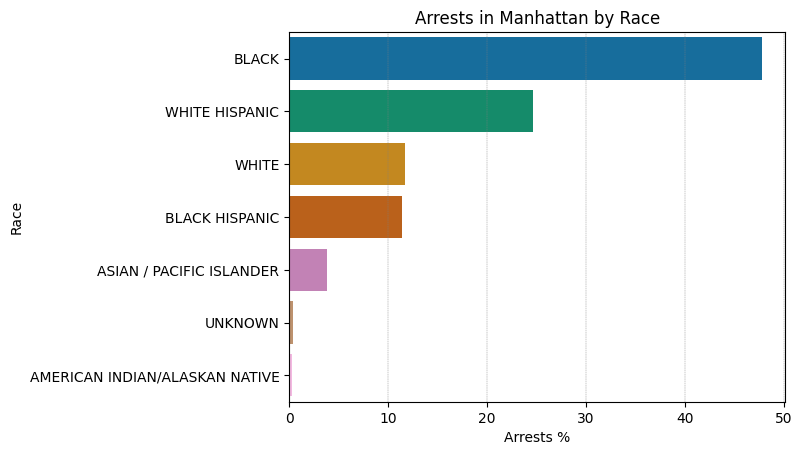

In [121]:
print(df.ARREST_BORO.unique())
print(df.AGE_GROUP.unique())
print(df.PERP_SEX.unique())
print(df.PERP_RACE.unique())
print('________________________________________________________________')

df2 = df.loc[df['ARREST_BORO'].str.contains('M')] # Selected Borough Manhattan
print(df2.groupby(['PERP_RACE'])['PERP_RACE'].count().sort_values(ascending = False))
print('________________________________________________________________')

ax = sns.countplot(df2, y = 'PERP_RACE', stat="percent", hue = 'PERP_RACE', legend=False, palette = 'colorblind', order = df2['PERP_RACE'].value_counts().index)
ax.set_title('Arrests in Manhattan by Race')
ax.set_xlabel('Arrests %')
ax.set_ylabel('Race')
ax.xaxis.grid(True, linestyle='--', linewidth=0.3, color='gray') # Customized grid appearance

AGE_GROUP
25-44    36119
45-64    13387
18-24     9354
<18       1985
65+       1124
Name: AGE_GROUP, dtype: int64
________________________________________________________________


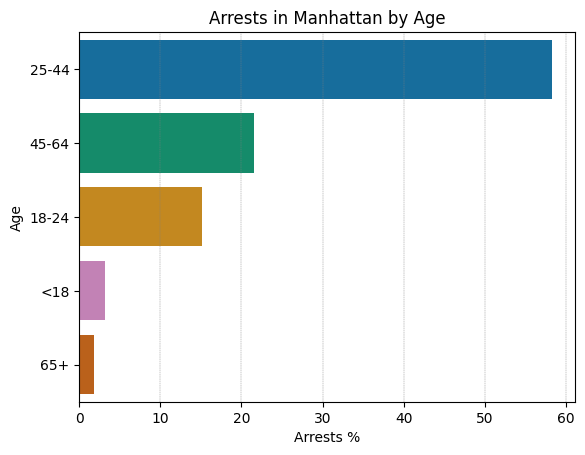

In [122]:
print(df2.groupby(['AGE_GROUP'])['AGE_GROUP'].count().sort_values(ascending = False))
print('________________________________________________________________')

ax = sns.countplot(df2, y = 'AGE_GROUP', stat="percent", hue = 'AGE_GROUP', legend=False, palette = 'colorblind', order = df2['AGE_GROUP'].value_counts().index)
ax.set_title('Arrests in Manhattan by Age')
ax.set_xlabel('Arrests %')
ax.set_ylabel('Age')
ax.xaxis.grid(True, linestyle='--', linewidth=0.3, color='gray') # Customized grid appearance

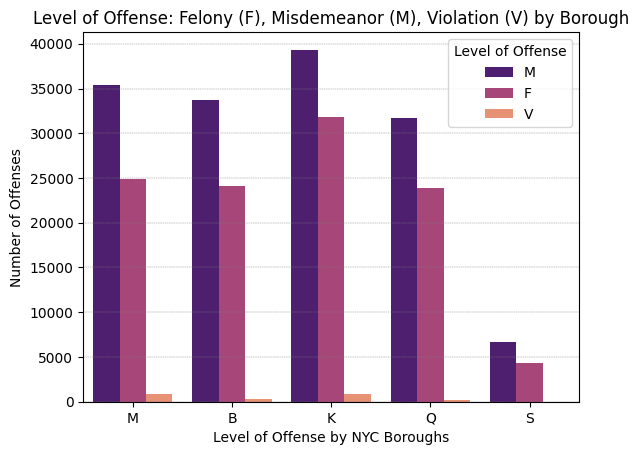

In [123]:
df3 = df[(df['LAW_CAT_CD'].str.contains('F')) | (df['LAW_CAT_CD'].str.contains('M')) | (df['LAW_CAT_CD'].str.contains('V'))]

ax = sns.countplot(df3, x = 'ARREST_BORO', stat="count", palette = 'magma', hue = 'LAW_CAT_CD', hue_order=['M', 'F', 'V'])
ax.set_title('Level of Offense: Felony (F), Misdemeanor (M), Violation (V) by Borough')
ax.set_xlabel('Level of Offense by NYC Boroughs')
ax.set_ylabel('Number of Offenses')
plt.legend(title='Level of Offense', loc='upper right' )
ax.yaxis.grid(True, linestyle='--', linewidth=0.3, color='gray') # Customized grid appearance

I randomly selected the Borough of Manhattan to analyze the Arrest in NYC by NYPD data. Per my analysis, I identified the races and age groups with the most to the least arrests. However, selecting a Borough at random, Manhattan in my analysis, isn’t guaranteed to remove bias completely to represent all of New York City's arrests.